In [96]:
import os
import pandas as pd
import math
import nltk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import re
from nltk.tokenize import WordPunctTokenizer
import pickle

In [97]:
def load_csv_as_df(file_name, sub_directories, col_name=None):
    '''
    Load any csv as a pandas dataframe. Provide the filename, the subdirectories, and columns to read(if desired).
    '''
    # sub_directories = '/Data/'
    base_path = os.getcwd()
    full_path = base_path + sub_directories + file_name
    
    if col_name is not None:
        return pd.read_csv(full_path, usecols=[col_name])
    
    # print('Full Path: ', full_path)
    return pd.read_csv(full_path, header=0)


def describe_bots(df, return_dfs=False, for_timeline=False):
    
    if for_timeline:
        df = df.drop_duplicates(subset='user_id', keep='last')
        bot_df = df[df.user_cap >= 0.53]
        human_df = df[df.user_cap < 0.4]
        removed_df = df[(df['user_cap'] >= 0.4) & (df['user_cap'] <= 0.53)]
    else:
        bot_df = df[df.cap >= 0.53]
        human_df = df[df.cap < 0.4]
        removed_df = df[(df['cap'] >= 0.4) & (df['cap'] <= 0.53)]
  
    bot_percent = len(bot_df)/len(df) * 100
    human_percent = len(human_df)/len(df) * 100
    removed_percent = len(removed_df)/len(df) * 100

    print('There are ', len(df), 'total records')
    print('There are ', len(bot_df), 'Bots in these records')
    print('Percentage of total accounts that are bots = ' + str(round(bot_percent, 2)) + '%')
    print('Percentage of total accounts that are humans = ' + str(round(human_percent, 2)) + '%')
    print('Percentage of total accounts that were removed = ' + str(round(removed_percent, 2)) + '%')
    
    if return_dfs:
        return bot_df, human_df, removed_df
    
def get_top_five_percent(df):
    number_of_accounts = len(df)
    top5 = int(number_of_accounts * 0.05)
    
    print("num accounts: ", number_of_accounts)
    print("top5: ", top5)
    
    top_df = df.cap.nlargest(top5)
    min_cap = top_df.min()
    return min_cap
    

In [98]:
master_df = load_csv_as_df('MasterIDs-4.csv', '/Data/Master-Data/')
error_df = load_csv_as_df('ErrorIDs-4.csv', '/Data/Master-Data/')

In [99]:
bot_df, human_df, removed_df = describe_bots(master_df, return_dfs=True)

There are  546310 total records
There are  14403 Bots in these records
Percentage of total accounts that are bots = 2.64%
Percentage of total accounts that are humans = 96.2%
Percentage of total accounts that were removed = 1.17%


In [100]:
print(len(error_df))

9641


In [101]:
min_cap = get_top_five_percent(master_df)
print(min_cap)

num accounts:  546310
top5:  27315
0.2967687660397612


num accounts:  546310
top5:  27315


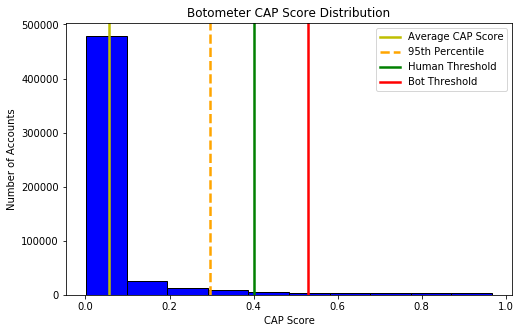

In [102]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.grid(False)
ax.set_title('Botometer CAP Score Distribution')
plt.hist(master_df.cap, bins=10, color='b', edgecolor='k')
plt.xlabel("CAP Score")
plt.ylabel("Number of Accounts")
plt.axvline(master_df.cap.mean(), color='y', linewidth=2.5, label='Average CAP Score')

min_cap = get_top_five_percent(master_df)
plt.axvline(x=min_cap, color='orange', linewidth=2.5, linestyle='dashed', label='95th Percentile')
plt.axvline(x=0.4, color='g', linewidth=2.5, label='Human Threshold')
plt.axvline(x=0.53, color='r', linewidth=2.5, label='Bot Threshold')

plt.legend()
plt.savefig('Botometer CAP Score Frequency.png', bbox_inches='tight')

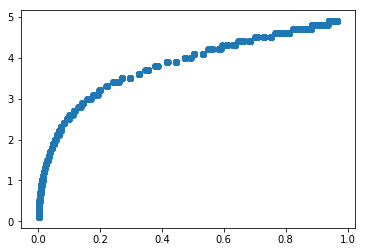

In [43]:
plt.scatter(master_df.cap, master_df.bot_score)

